# Decision Tree Classification


import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df=sns.load_dataset('titanic')

In [3]:
X=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [4]:
X = pd.get_dummies(X, columns=['sex'])

In [5]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
X.age.fillna(X['age'].mean(), inplace=True)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [8]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
y_pred=model.predict(X_test)

In [10]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.8379888268156425


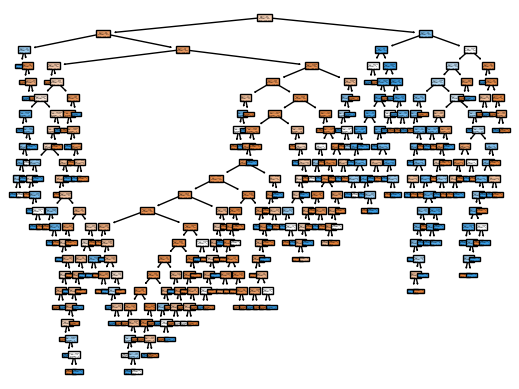

<Figure size 640x480 with 0 Axes>

In [11]:
#tree plot
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig('tree.png')

In [12]:
#precision
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test,y_pred)

0.8333333333333334

In [13]:
#recall
recall_score(y_test,y_pred)

0.7534246575342466

In [14]:
#f1_score
f1_score(y_test,y_pred)

0.7913669064748201

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[95, 11],
       [18, 55]], dtype=int64)

<Axes: >

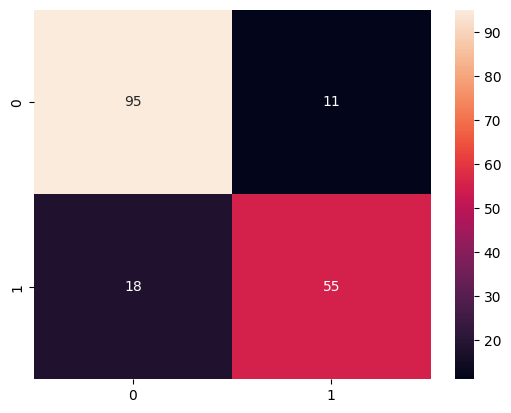

In [16]:
sns.heatmap(cm,annot=True)

# k_nearest neighbours(KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[80, 26],
       [29, 44]], dtype=int64)

In [18]:
precision_score(y_test,y_pred)

0.6285714285714286

In [19]:
recall_score(y_test,y_pred)

0.6027397260273972

In [20]:
f1_score(y_test,y_pred)

0.6153846153846154

Text(0.5, 23.52222222222222, 'Predicted Lable')

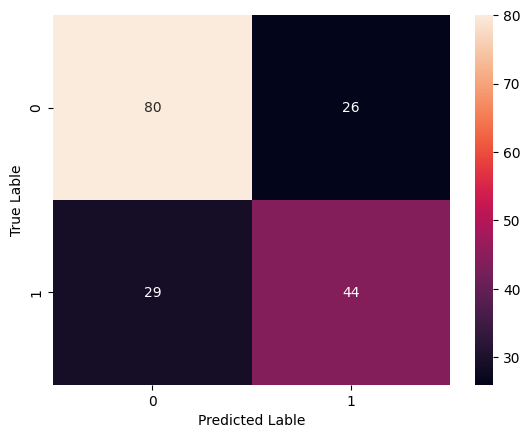

In [21]:
sns.heatmap(cm, annot=True)
plt.ylabel('True Lable')
plt.xlabel('Predicted Lable')

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("trecall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[98  8]
 [13 60]]
precision score:  0.8823529411764706
trecall score:  0.821917808219178
f1 score:  0.8510638297872339


# Logistic Regression

It is the model of classification

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("trecall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[90 16]
 [16 57]]
precision score:  0.7808219178082192
trecall score:  0.7808219178082192
f1 score:  0.7808219178082192


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

support vector machine

In [24]:
from sklearn.svm import SVC

model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("trecall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[92 14]
 [53 20]]
precision score:  0.5882352941176471
trecall score:  0.273972602739726
f1 score:  0.37383177570093457


# Naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("trecall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[88 18]
 [14 59]]
precision score:  0.7662337662337663
trecall score:  0.8082191780821918
f1 score:  0.7866666666666666


# Best model selection based on data

In [29]:
# import libraries and models
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define the models to be evaluated 
models= [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC()]
names= ['Logistic Regression','KNN','Random Forest','SVM']

# perform k-fold cross validation for each model
k=10
for name, model in zip(names, models):
    cv_scores=cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression CV accuracy: 0.788 +/- 0.030
KNN CV accuracy: 0.695 +/- 0.034
Random Forest CV accuracy: 0.777 +/- 0.030
SVM CV accuracy: 0.691 +/- 0.044


# Hyperparameter tunning

In [31]:
from sklearn.model_selection import GridSearchCV

#define the parameter grid
param_grid={'C' : [0.1, 1, 10],
            'kernel' : ['linear', 'rbf'],
            'gamma' : [0.1, 1, 10]}

grid_search= GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-vlidation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-vlidation score: 0.78


___
## 13-07-2023